In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1084,ham,For me the love should start with attraction.i...,NaN,NaN,NaN
999,ham,"Aight will do, thanks again for comin out",NaN,NaN,NaN
3968,ham,Thanks for your message. I really appreciate y...,NaN,NaN,NaN
4786,ham,ÌÏ thk of wat to eat tonight.,NaN,NaN,NaN
5419,ham,I'm at bruce &amp; fowler now but I'm in my mo...,NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.shape

(5572, 5)

In [6]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
630,ham,Please dont say like that. Hi hi hi
1876,ham,Watching tv now. I got new job :)
168,ham,Great escape. I fancy the bridge but needs her...
1168,ham,Ok . . now i am in bus. . If i come soon i wil...
2323,ham,Sorry dude. Dont know how i forgot. Even after...


In [10]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
613,ham,THANX4 TODAY CER IT WAS NICE 2 CATCH UP BUT WE...
4329,ham,i thought we were doing a king of the hill thi...
2232,ham,Nothing just getting msgs by dis name wit diff...
4829,ham,"The word \Checkmate\"" in chess comes from the ..."
5445,ham,"And that's fine, I got enough bud to last most..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate values
df.duplicated().sum()

403

In [16]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## 2.EDA - Exploratrary Data Analysis

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

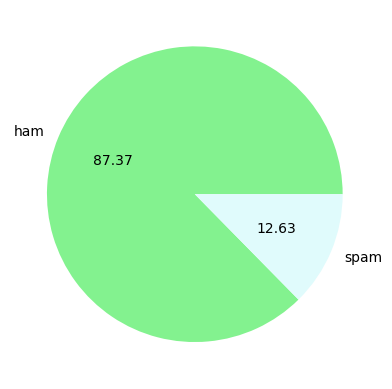

In [21]:
import matplotlib.pyplot as plt

# Assuming df['target'].value_counts() returns counts for 'ham' and 'spam'
counts = df['target'].value_counts()

# Define colors for 'ham' and 'spam'
colors = ['#83f28f', '#e0fbfc']

plt.pie(counts, labels=['ham', 'spam'], autopct="%0.2f", colors=colors)
plt.show()


In [22]:
# Data is imbalanced

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Soham_Arote_9623\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


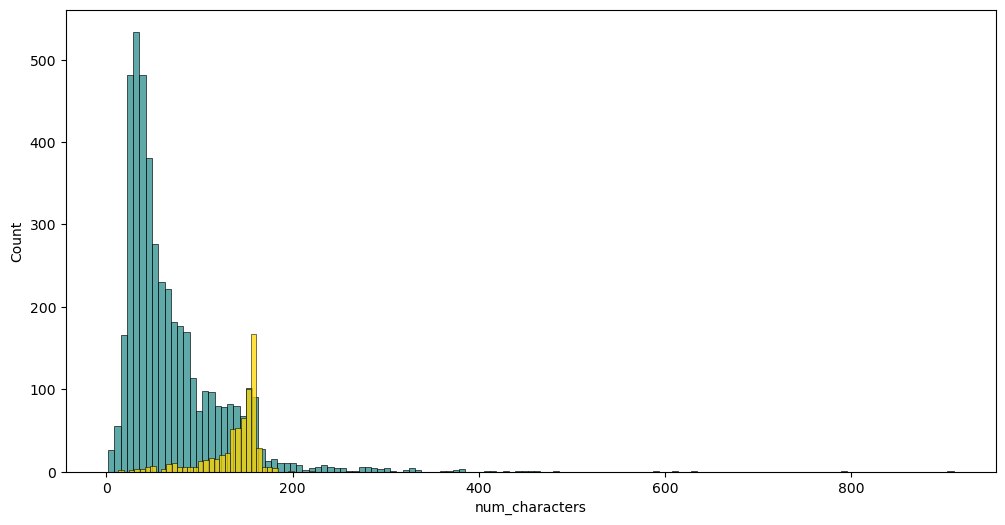

In [35]:
color1 = '#298c8c'
color2 = '#FFD700' 

plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'], color=color1)
sns.histplot(df[df['target'] == 1]['num_characters'], color=color2)
plt.show()

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

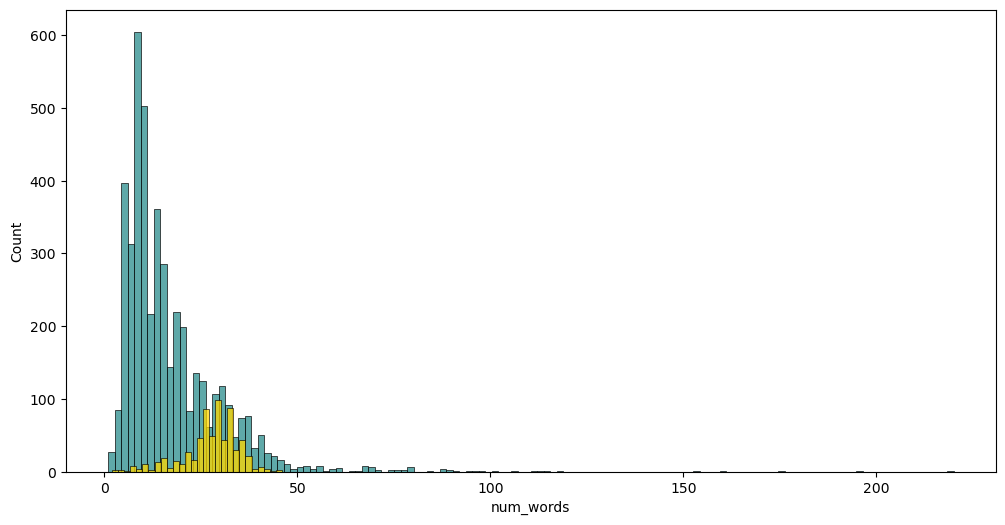

In [36]:
color1 = '#298c8c'
color2 = '#FFD700'
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'], color=color1)
sns.histplot(df[df['target'] == 1]['num_words'], color=color2)

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


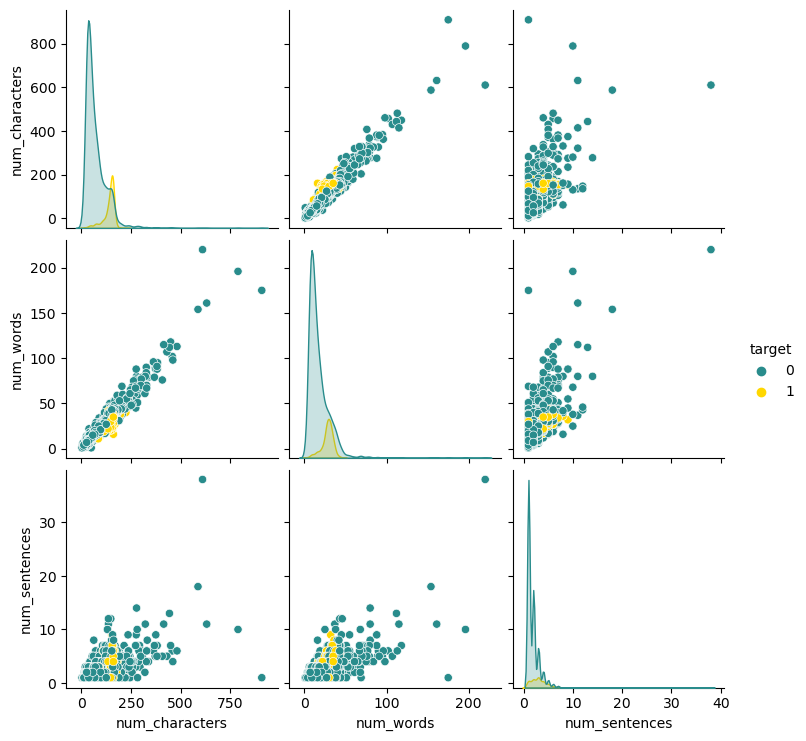

In [37]:
palette = {0: '#298c8c', 1: '#FFD700'}

sns.pairplot(df, hue='target', palette=palette)
plt.show()

In [38]:
# df_numeric = df.apply(pd.to_numeric, errors='coerce')

# # Drop any rows with NaN values
# df_numeric = df_numeric.dropna()

# # Create the correlation matrix
# corr_matrix = df_numeric.corr()

# # Plot the heatmap
# sns.heatmap(corr_matrix, annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [39]:
import streamlit as st
import pickle
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [40]:

# Initialize the PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
ps = PorterStemmer()
ps.stem('playing')

'play'

In [44]:
df['transformed_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='#FFFDD0')

In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

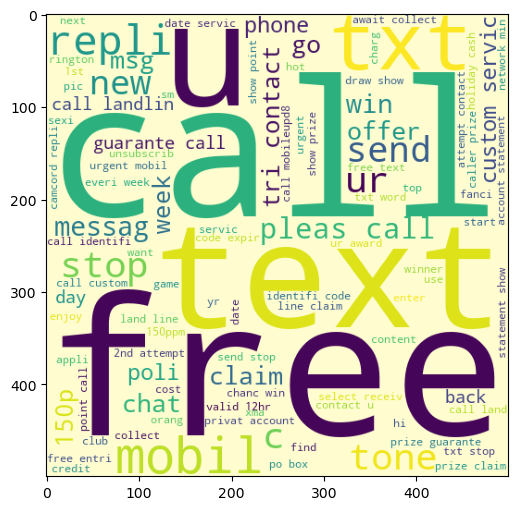

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

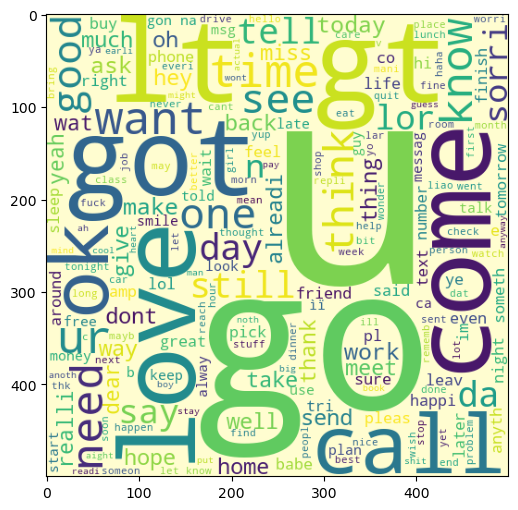

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [53]:
len(spam_corpus)

9939

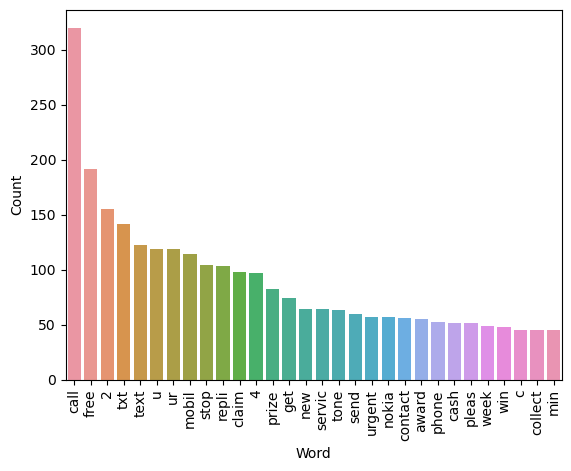

In [54]:
from collections import Counter


# Counter used to count the occurrences of each word
word_counts = Counter(spam_corpus)

# Converting the Counter to a DataFrame for easier plotting using borplot
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create the bar plot
sns.barplot(x='Word', y='Count', data=word_counts_df)
plt.xticks(rotation='vertical')
plt.show()


In [55]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
len(ham_corpus)

35404

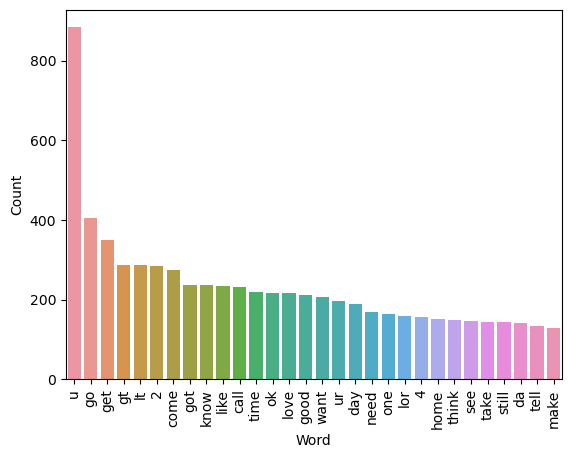

In [57]:
# Counter used to count the occurrences of each word
word_counts = Counter(ham_corpus)

# Convert the Counter to a DataFrame for easier plotting using Barplot
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create the bar plot
sns.barplot(x='Word', y='Count', data=word_counts_df)
plt.xticks(rotation='vertical')
plt.show()

In [58]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [62]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [63]:
X.shape

(5169, 3000)

In [64]:
y = df['target'].values

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [67]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [68]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [70]:
y_pred = rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9758220502901354
Confusion Matrix:
 [[894   2]
 [ 23 115]]
Precision: 0.9829059829059829
Recall: 0.8333333333333334
F1 Score: 0.9019607843137254


In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [74]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [75]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [76]:
# tfidf --> MNB

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC    #support vector classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [79]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [80]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    
}


In [81]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall,f1

In [82]:
# def train_classifier(clf, X_train, y_train, X_test, y_test):
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
    
#     if hasattr(clf, "predict") and callable(clf.predict):
#         y_pred_continuous = clf.predict(X_test)
#         regression = r2_score(y_test, y_pred_continuous)
#     else:
#         regression = None
    
#     return accuracy, precision, recall, regression

In [83]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354,
 0.9747899159663865,
 0.8405797101449275,
 0.9027237354085604)

In [84]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores =[]
for name, clf in clfs.items():

    current_accuracy, current_precision, current_recall,current_f1 = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    print("Recall - ", current_recall)
    print("F1 Score:", current_f1)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
Recall -  0.8405797101449275
F1 Score: 0.9027237354085604
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
Recall -  0.2898550724637681
F1 Score: 0.44943820224719105
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
Recall -  0.782608695652174
F1 Score: 0.878048780487805
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
Recall -  0.5942028985507246
F1 Score: 0.6861924686192469
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
Recall -  0.7101449275362319
F1 Score: 0.8200836820083682
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
Recall -  0.8333333333333334
F1 Score: 0.9019607843137254
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
Recall -  0.7608695652173914
F1 Score: 0.8366533864541833
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
Recall -  0.8115942028985508
F1 Score: 0.838951310

In [85]:
# accuracy_scores = []
# precision_scores = []
# recall_scores = []
# regression_scores = []

# for name, clf in clfs.items():
    
#     current_accuracy, current_precision, current_recall, current_regression = train_classifier(clf, X_train, y_train, X_test, y_test)
    
#     print("For ", name)
#     print("Accuracy - ", current_accuracy)
#     print("Precision - ", current_precision)
#     print("Recall - ", current_recall)

#     if current_regression is not None:
#         print("Regression Score - ", current_regression)

#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)
#     recall_scores.append(current_recall)
#     regression_scores.append(current_regression)

In [86]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Regression':regression_scores}).sort_values('Precision',ascending=False)

In [87]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'F1':f1_scores}).sort_values('Precision',ascending=False)

In [88]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1
1,KN,0.905222,1.000000,0.289855,0.449438
2,NB,0.970986,1.000000,0.782609,0.878049
5,RF,0.975822,0.982906,0.833333,0.901961
0,SVC,0.975822,0.974790,0.840580,0.902724
8,ETC,0.974855,0.974576,0.833333,0.898438
4,LR,0.958414,0.970297,0.710145,0.820084
6,AdaBoost,0.960348,0.929204,0.760870,0.836653
9,GBDT,0.946809,0.919192,0.659420,0.767932
7,BgC,0.958414,0.868217,0.811594,0.838951
3,DT,0.927466,0.811881,0.594203,0.686192


In [89]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [90]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.927466


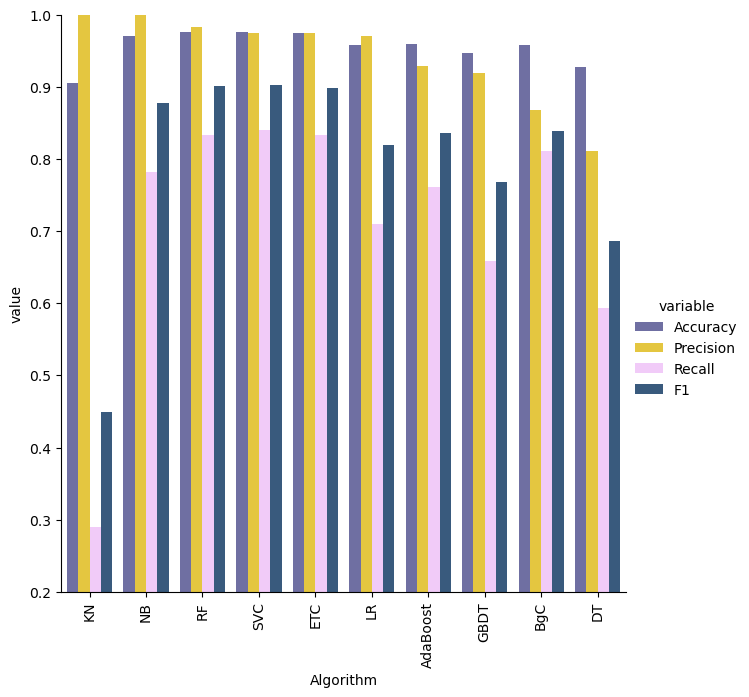

In [91]:
custom_palette = ["#6667AB","#FFD825","#F6C3FF","#2E5A88"]
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=6.5, palette=custom_palette)
plt.ylim(0.2,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [92]:
# custom_palette = ["#6667AB","#FFD825","#F6C3FF","#2E5A88"]
# sns.catplot(x = 'Algorithm', y='value', 
#                hue = 'variable',data=performance_df1, kind='bar',height=6.5, palette=custom_palette)
# plt.ylim(0.1,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

# model improve
# 1. Change the max_features parameter of TfIdf

In [93]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores,'Recall_max_ft_3000':recall_scores,'f1_max_ft_3000':f1_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores,'Recall_scalling':recall_scores,'f1_scalling':f1_scores}).sort_values('Precision_scaling',ascending=False)

In [95]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [96]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [97]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores,'Recall_num_chars':recall_scores,'f1_num_chars':f1_scores}).sort_values('Precision_num_chars',ascending=False)

In [98]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Recall,F1,Accuracy_scaling_x,Precision_scaling_x,Recall_scalling_x,f1_scalling_x,Accuracy_scaling_y,Precision_scaling_y,Recall_scalling_y,f1_scalling_y,Accuracy_num_chars,Precision_num_chars,Recall_num_chars,f1_num_chars
0,KN,0.905222,1.000000,0.289855,0.449438,0.905222,1.000000,0.289855,0.449438,0.905222,1.000000,0.289855,0.449438,0.905222,1.000000,0.289855,0.449438
1,NB,0.970986,1.000000,0.782609,0.878049,0.970986,1.000000,0.782609,0.878049,0.970986,1.000000,0.782609,0.878049,0.970986,1.000000,0.782609,0.878049
2,RF,0.975822,0.982906,0.833333,0.901961,0.975822,0.982906,0.833333,0.901961,0.975822,0.982906,0.833333,0.901961,0.975822,0.982906,0.833333,0.901961
3,SVC,0.975822,0.974790,0.840580,0.902724,0.975822,0.974790,0.840580,0.902724,0.975822,0.974790,0.840580,0.902724,0.975822,0.974790,0.840580,0.902724
4,ETC,0.974855,0.974576,0.833333,0.898438,0.974855,0.974576,0.833333,0.898438,0.974855,0.974576,0.833333,0.898438,0.974855,0.974576,0.833333,0.898438
5,LR,0.958414,0.970297,0.710145,0.820084,0.958414,0.970297,0.710145,0.820084,0.958414,0.970297,0.710145,0.820084,0.958414,0.970297,0.710145,0.820084
6,AdaBoost,0.960348,0.929204,0.760870,0.836653,0.960348,0.929204,0.760870,0.836653,0.960348,0.929204,0.760870,0.836653,0.960348,0.929204,0.760870,0.836653
7,GBDT,0.946809,0.919192,0.659420,0.767932,0.946809,0.919192,0.659420,0.767932,0.946809,0.919192,0.659420,0.767932,0.946809,0.919192,0.659420,0.767932
8,BgC,0.958414,0.868217,0.811594,0.838951,0.958414,0.868217,0.811594,0.838951,0.958414,0.868217,0.811594,0.838951,0.958414,0.868217,0.811594,0.838951
9,DT,0.927466,0.811881,0.594203,0.686192,0.927466,0.811881,0.594203,0.686192,0.927466,0.811881,0.594203,0.686192,0.927466,0.811881,0.594203,0.686192


In [99]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [100]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [101]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [102]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))
print("f1",f1_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827
Recall 0.8695652173913043
f1 0.9266409266409266


In [103]:
y_pred = rfc.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))
print("f1",f1_score(y_test,y_pred))

Accuracy 0.9758220502901354
Precision 0.9829059829059829
Recall 0.8333333333333334
f1 0.9019607843137254


In [104]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [105]:
from sklearn.ensemble import StackingClassifier

In [106]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [107]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))
print("f1",f1_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428
Recall 0.9057971014492754
f1 0.929368029739777


In [108]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9816247582205029
Confusion Matrix:
 [[890   6]
 [ 13 125]]
Precision: 0.9541984732824428
Recall: 0.9057971014492754
F1 Score: 0.929368029739777


In [109]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))